In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
# First, create array for latitudes and longitudes, that we'll declare as a variable,
# so they can be stored and accessed later.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from citipy import citipy

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-67.54160113485189 -6.624677145264968
-81.62900960832596 -102.56848499216994
-43.572628110794795 -157.23388484041098
-80.02966681330875 -167.36086414403343
-64.3715405243113 -178.43751714557584
70.26905078262445 -152.39623439099566
-15.78584227855957 51.53697689940003
-75.37529237847356 -114.29658586678498
-66.17887404084476 -171.41839444818214
-13.253506088114065 -172.4713397392895
72.47040162345422 -116.4510617549034
-35.97629744118945 -144.51356904625686
85.92295725112848 55.83353265590097
-55.052434035377686 -49.080075344703744
25.39277594508127 -3.977044677359487
31.341118016679772 -81.43469892051746
72.95028947701061 90.04312112411282
-62.31909862872638 53.50061872391473
38.196886375005676 -54.551802680656806
55.01431961222812 94.38802872995905
-65.97346825147702 38.73203335196416
-68.45691515452373 106.42533982061263
51.36962199956932 21.322632768934596
27.24156948451315 -157.28341936224348
-50.505763142949405 -99.2118097617082
67.1022601687844 119.38756956031773
-15.51307194504

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)   

cape town za
punta arenas cl
mataura pf
avarua ck
vaini to
barrow us
antalaha mg
punta arenas cl
vaini to
sasina ws
yellowknife ca
mataura pf
belushya guba ru
mar del plata ar
taoudenni ml
brunswick us
talnakh ru
taolanaro mg
saint-pierre pm
partizanskoye ru
port alfred za
albany au
pionki pl
kapaa us
castro cl
verkhnevilyuysk ru
itapirapua br
tromso no
hobart au
provideniya ru
albany au
busselton au
rikitea pf
saskylakh ru
namatanai pg
abha sa
port lincoln au
east london za
wanning cn
vestmannaeyjar is
saskylakh ru
bambous virieux mu
ponta do sol cv
kamina cd
sur om
albany au
alofi nu
vaini to
chokurdakh ru
vila velha br
bubaque gw
amot no
jhalida in
saskylakh ru
tumannyy ru
port-gentil ga
vaitupu wf
hobart au
umarkot pk
grindavik is
zhangye cn
yar-sale ru
carnarvon au
grand gaube mu
brae gb
celestun mx
masallatah ly
clifton us
georgetown sh
aswan eg
jaguarao br
cape town za
salinopolis br
leningradskiy ru
bengkulu id
rikitea pf
torbay ca
gwadar pk
asfi ma
port shepstone za
haines jun

kapaa us
saint george bm
bubaque gw
labuhan id
albany au
kodiak us
urumqi cn
cape town za
provideniya ru
nikolskoye ru
rikitea pf
saint-philippe re
vao nc
vestmannaeyjar is
dunedin nz
punta arenas cl
constitucion mx
castro cl
tuktoyaktuk ca
toamasina mg
kodiak us
butaritari ki
samusu ws
ushuaia ar
bethel us
crab hill bb
taolanaro mg
belushya guba ru
bargal so
ushuaia ar
davila ph
sayyan ye
riverton nz
ushuaia ar
rikitea pf
mataura pf
iskateley ru
yellowknife ca
faya td
rusape zw
yellowknife ca
rikitea pf
muzhi ru
punta arenas cl
semnan ir
axim gh
yerbogachen ru
nizhneyansk ru
ushuaia ar
kenai us
longyearbyen sj
vila velha br
corrente br
ribeira grande pt
grande prairie ca
hobart au
sambava mg
svetlyy ru
irece br
kutum sd
mahebourg mu
mys shmidta ru
turukhansk ru
benjamin hill mx
tasiilaq gl
nikolskoye ru
qaanaaq gl
puerto madero mx
puerto ayora ec
mulege mx
cape town za
bredy ru
pinos mx
teahupoo pf
bairiki ki
mizan teferi et
victoria sc
pallapatti in
taoudenni ml
bluff nz
bethel us
ce

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
# we added another feature to the URL: units=Imperial. Other option is metric.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d36b7cfa76097fcbc438ac09d9ad4804


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters and initialize them at 1 
# because we want the first iteration of the logging for each recorded response and the set to start at 1.
record_count = 1
set_count = 1


# Loop Through the List of Cities and Build the City URL
# for i in range(len(cities)) will not be used due to programming errors 
# because it adds the index, not the city name, to the city_url
# Loop through all the cities in our list using enumerate() method as an alternative way
# to iterate through the list of cities and retrieve both the index, and the city from the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. 
    # Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command.
    # The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program
    # for one minute after each set of 50 will prevent time-out errors.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    
    # Run an API request for each of the cities; use try-except block.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | antalaha
Processing Record 8 of Set 1 | sasina
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | taoudenni
Processing Record 13 of Set 1 | brunswick
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | partizanskoye
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | pionki
Processing Record 21 of Set 1 | kapaa
Processing Record

Processing Record 37 of Set 4 | gariaband
Processing Record 38 of Set 4 | zhanaozen
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | haapu
City not found. Skipping...
Processing Record 41 of Set 4 | tooele
Processing Record 42 of Set 4 | biloli
Processing Record 43 of Set 4 | saint cloud
Processing Record 44 of Set 4 | wajima
Processing Record 45 of Set 4 | te anau
Processing Record 46 of Set 4 | dese
Processing Record 47 of Set 4 | karratha
Processing Record 48 of Set 4 | kushiro
Processing Record 49 of Set 4 | miri
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | codrington
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | santo angelo
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | maghama
City not found. Skipping...
Processing Record 7 of Set 5 | ambodifototra
City not found. Skipping...
Processing Record 8 of Set 5 | shingu
Processing Record 9 of Set 5

Processing Record 26 of Set 8 | iskateley
Processing Record 27 of Set 8 | rusape
Processing Record 28 of Set 8 | muzhi
Processing Record 29 of Set 8 | semnan
Processing Record 30 of Set 8 | axim
Processing Record 31 of Set 8 | yerbogachen
Processing Record 32 of Set 8 | kenai
Processing Record 33 of Set 8 | corrente
Processing Record 34 of Set 8 | grande prairie
Processing Record 35 of Set 8 | sambava
Processing Record 36 of Set 8 | svetlyy
Processing Record 37 of Set 8 | irece
Processing Record 38 of Set 8 | kutum
Processing Record 39 of Set 8 | turukhansk
Processing Record 40 of Set 8 | benjamin hill
Processing Record 41 of Set 8 | puerto madero
Processing Record 42 of Set 8 | mulege
Processing Record 43 of Set 8 | bredy
Processing Record 44 of Set 8 | pinos
Processing Record 45 of Set 8 | teahupoo
Processing Record 46 of Set 8 | bairiki
Processing Record 47 of Set 8 | mizan teferi
Processing Record 48 of Set 8 | pallapatti
Processing Record 49 of Set 8 | cedar city
Processing Record

Processing Record 14 of Set 12 | mwaro
Processing Record 15 of Set 12 | sivaki
Processing Record 16 of Set 12 | pisco
Processing Record 17 of Set 12 | mao
Processing Record 18 of Set 12 | diego de almagro
Processing Record 19 of Set 12 | kirakira
Processing Record 20 of Set 12 | ust-nera
Processing Record 21 of Set 12 | quatre cocos
Processing Record 22 of Set 12 | pangkalanbuun
Processing Record 23 of Set 12 | show low
Processing Record 24 of Set 12 | yemtsa
Processing Record 25 of Set 12 | kaoma
Processing Record 26 of Set 12 | yarim
Processing Record 27 of Set 12 | kashi
Processing Record 28 of Set 12 | mudhol
Processing Record 29 of Set 12 | arys
Processing Record 30 of Set 12 | dinghai
Processing Record 31 of Set 12 | havre-saint-pierre
Processing Record 32 of Set 12 | viedma
Processing Record 33 of Set 12 | san pedro
Processing Record 34 of Set 12 | broken hill
Processing Record 35 of Set 12 | lakatoro
Processing Record 36 of Set 12 | moose factory
Processing Record 37 of Set 12 

In [15]:
# After collecting all our data, tally the number of cities in the city_data array of dictionaries using the len() function.
len(city_data)

569

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,67.12,85,75,12.66,ZA,2022-11-15 18:15:08
1,Punta Arenas,-53.1500,-70.9167,64.42,51,0,11.50,CL,2022-11-15 18:18:41
2,Mataura,-46.1927,168.8643,58.48,66,94,1.36,NZ,2022-11-15 18:19:03
3,Avarua,-21.2078,-159.7750,75.25,64,96,10.36,CK,2022-11-15 18:19:04
4,Vaini,-21.2000,-175.2000,71.76,94,20,1.14,TO,2022-11-15 18:19:04
5,Barrow,71.2906,-156.7887,24.82,80,100,32.21,US,2022-11-15 18:15:15
6,Antalaha,-14.9003,50.2788,71.94,91,4,6.78,MG,2022-11-15 18:17:16
7,Sasina,44.7987,16.7390,39.18,82,73,3.67,BA,2022-11-15 18:19:05
8,Yellowknife,62.4560,-114.3525,25.32,80,100,21.85,CA,2022-11-15 18:16:46
9,Mar Del Plata,-38.0023,-57.5575,76.82,42,0,13.80,AR,2022-11-15 18:19:06


In [20]:
# To reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

columnsTitles = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Then, we assign the same DataFrame with new column order using reindex() function
city_data_df = pd.DataFrame(city_data).reindex(columns=columnsTitles)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-11-15 18:15:08,-33.9258,18.4232,67.12,85,75,12.66
1,Punta Arenas,CL,2022-11-15 18:18:41,-53.1500,-70.9167,64.42,51,0,11.50
2,Mataura,NZ,2022-11-15 18:19:03,-46.1927,168.8643,58.48,66,94,1.36
3,Avarua,CK,2022-11-15 18:19:04,-21.2078,-159.7750,75.25,64,96,10.36
4,Vaini,TO,2022-11-15 18:19:04,-21.2000,-175.2000,71.76,94,20,1.14
5,Barrow,US,2022-11-15 18:15:15,71.2906,-156.7887,24.82,80,100,32.21
6,Antalaha,MG,2022-11-15 18:17:16,-14.9003,50.2788,71.94,91,4,6.78
7,Sasina,BA,2022-11-15 18:19:05,44.7987,16.7390,39.18,82,73,3.67
8,Yellowknife,CA,2022-11-15 18:16:46,62.4560,-114.3525,25.32,80,100,21.85
9,Mar Del Plata,AR,2022-11-15 18:19:06,-38.0023,-57.5575,76.82,42,0,13.80


In [21]:
# Create the output file (CSV).
output_data_file = "../World Weather Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

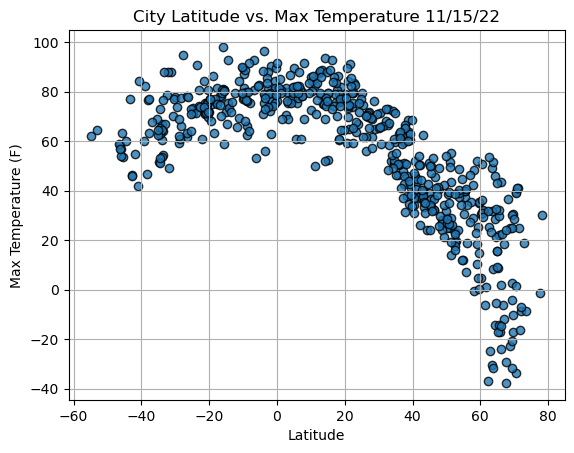

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

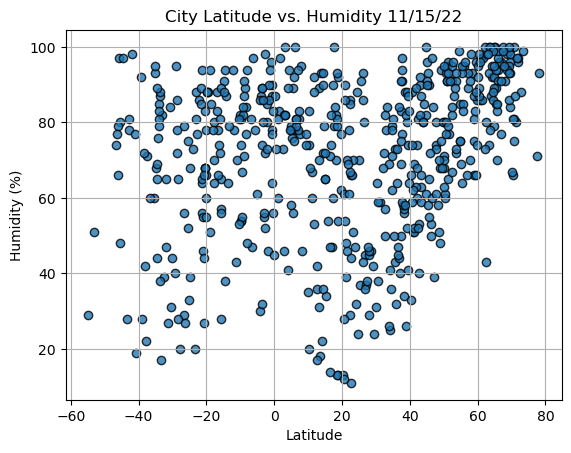

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

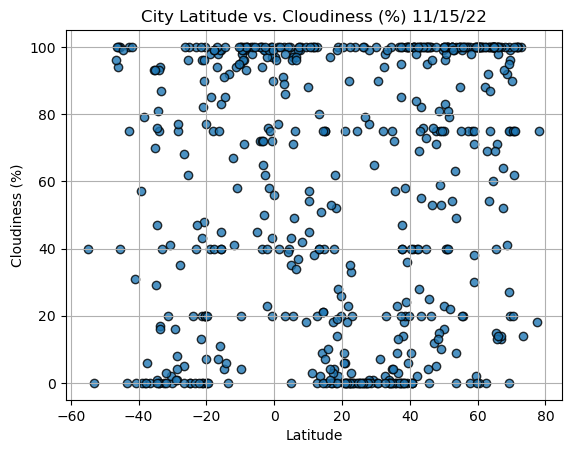

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

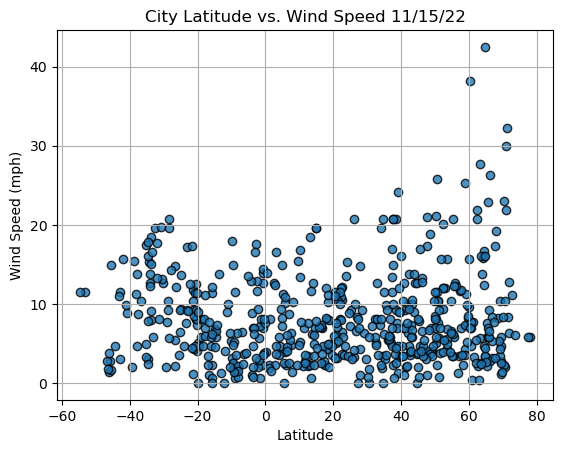

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()